In [ ]:
!pip install cartopy
!pip install os
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 64.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
# Define the directory path
directory = '/content/drive/MyDrive/HS_Term_paper/'

Mounted at /content/drive


In [ ]:
locations = [
    {"STATIONNAME": "RANGPUR", "LATITUDE": 25.73, "LONGITUDE": 89.23},
    {"STATIONNAME": "RAJSHAHI", "LATITUDE": 24.36, "LONGITUDE": 88.6},
    {"STATIONNAME": "BOGRA", "LATITUDE": 24.85, "LONGITUDE": 89.36},
    {"STATIONNAME": "MYMENSINGH", "LATITUDE": 24.74, "LONGITUDE": 90.42},
    {"STATIONNAME": "SYLHET", "LATITUDE": 24.89, "LONGITUDE": 91.88},
    {"STATIONNAME": "SREEMANGAL", "LATITUDE": 24.3, "LONGITUDE": 91.73},
    {"STATIONNAME": "ISHWARDI", "LATITUDE": 24.14, "LONGITUDE": 89.06},
    {"STATIONNAME": "DHAKA", "LATITUDE": 23.76, "LONGITUDE": 90.38},
    {"STATIONNAME": "COMILLA", "LATITUDE": 23.46, "LONGITUDE": 91.18},
    {"STATIONNAME": "CHANDPUR", "LATITUDE": 23.22, "LONGITUDE": 90.66},
    {"STATIONNAME": "JESSORE", "LATITUDE": 23.17, "LONGITUDE": 89.21},
    {"STATIONNAME": "FARIDPUR", "LATITUDE": 23.6, "LONGITUDE": 89.83},
    {"STATIONNAME": "MADARIPUR", "LATITUDE": 23.16, "LONGITUDE": 90.2},
    {"STATIONNAME": "KHULNA", "LATITUDE": 22.8, "LONGITUDE": 89.55},
    {"STATIONNAME": "SATKHIRA", "LATITUDE": 22.72, "LONGITUDE": 89.07},
    {"STATIONNAME": "BARISAL", "LATITUDE": 22.7, "LONGITUDE": 90.37},
    {"STATIONNAME": "BHOLA", "LATITUDE": 22.68, "LONGITUDE": 90.65},
    {"STATIONNAME": "FENI", "LATITUDE": 23.01, "LONGITUDE": 91.4},
    {"STATIONNAME": "MAIJDEE COURT", "LATITUDE": 22.84, "LONGITUDE": 91.1},
    {"STATIONNAME": "HATIYA", "LATITUDE": 22.38, "LONGITUDE": 91.11},
    {"STATIONNAME": "SITAKUNDA", "LATITUDE": 22.61, "LONGITUDE": 91.66},
    {"STATIONNAME": "SANDWIP", "LATITUDE": 22.51, "LONGITUDE": 91.43},
    {"STATIONNAME": "CHITTAGONG", "LATITUDE": 22.26, "LONGITUDE": 91.81},
    {"STATIONNAME": "KUTUBDIA", "LATITUDE": 21.82, "LONGITUDE": 91.86},
    {"STATIONNAME": "COXS BAZAR", "LATITUDE": 21.44, "LONGITUDE": 91.97},
    {"STATIONNAME": "TEKNAF", "LATITUDE": 20.86, "LONGITUDE": 92.3},
    {"STATIONNAME": "RANGAMATI", "LATITUDE": 22.65, "LONGITUDE": 92.18},
    {"STATIONNAME": "PATUAKHALI", "LATITUDE": 22.34, "LONGITUDE": 90.31},
    {"STATIONNAME": "KHEPUPARA", "LATITUDE": 21.99, "LONGITUDE": 90.24},
    {"STATIONNAME": "TANGAIL", "LATITUDE": 24.25, "LONGITUDE": 89.91},
    {"STATIONNAME": "DINAJPUR", "LATITUDE": 25.65, "LONGITUDE": 88.683},
    {"STATIONNAME": "Chuadanga", "LATITUDE": 25.63, "LONGITUDE": 88.82},
    {"STATIONNAME": "SAIDPUR", "LATITUDE": 25.783, "LONGITUDE": 88.883},
    {"STATIONNAME": "MONGLA", "LATITUDE": 22.33, "LONGITUDE": 89.6}
]

In [ ]:
import pandas as pd
import os

# Define the directory path for the BMD monthly sum data
bmd_filepath = "/content/drive/MyDrive/HS_Term_paper/Rain/BMD_monthly_sum.xlsx"

# Step 1: Import the BMD monthly sum data
BMD_monthly_sum = pd.read_excel(bmd_filepath)

# Step 2: Clip the DataFrame by the 'Date' column for the period of 1995-2014
BMD_monthly_sum = BMD_monthly_sum[(BMD_monthly_sum['Date'] >= '1995-01-01') & (BMD_monthly_sum['Date'] <= '2014-12-31')]

# Step 3: Convert the 'Date' column to datetime format
BMD_monthly_sum['Date'] = pd.to_datetime(BMD_monthly_sum['Date'])

# Step 4: Set the 'Date' column as the index
BMD_monthly_sum.set_index('Date', inplace=True)

# Step 5: Resample the DataFrame by year and calculate the sum for each column
BMD_yearly_sum = BMD_monthly_sum.resample('Y').sum()

# Calculate mean and std for BMD_yearly_sum
BMD_mean = BMD_yearly_sum.mean().mean()
BMD_std = BMD_yearly_sum.mean().std()

# Define the directory path where the climate model Excel files are located
directory_path = "/content/drive/MyDrive/HS_Term_paper/Climate Models(1995-2014)"

# List all files in the directory
files = os.listdir(directory_path)

# Create a dictionary to store datasets for each model
model_datasets = {}

# Create a list to store dataset names
dataset_names = []

# Iterate through each file and load the datasets
for file in files:
    if file.endswith(".xlsx"):
        model_name = file.split("(")[0].strip()  # Extract the model name before "("
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)
        model_datasets[model_name] = df
        dataset_names.append(model_name)

# Dictionary to store modified datasets
modified_datasets = {}

# Iterate through each dataset and retain relevant columns
for dataset_name in dataset_names:
    df = model_datasets[dataset_name].copy()
    common_columns = df.columns.intersection(BMD_monthly_sum.columns)
    columns_to_keep = list(common_columns) + ['Date'] if 'Date' in df.columns else list(common_columns)
    modified_df = df[columns_to_keep]
    modified_datasets[dataset_name] = modified_df

# Replace negative values and resample by year
for dataset_name, modified_df in modified_datasets.items():
    if 'Date' in modified_df.columns:
        # Ensure 'Date' column is in datetime format
        modified_df['Date'] = pd.to_datetime(modified_df['Date'])

        # Set 'Date' column as index
        modified_df.set_index('Date', inplace=True)

        # # Multiply all values except 'Date' by 86400 for specified datasets
        # if dataset_name in ['CCCR-IITM_ESM', 'CCCR-IITM', 'CanESM5']:
        #     modified_df *= 86400

        # Replace negative values with 0
        modified_df[modified_df.columns] = modified_df[modified_df.columns].applymap(lambda x: max(0, x))

        # Resample by year and calculate the sum
        modified_df_yearly_sum = modified_df.resample('Y').sum()

        # Store the modified dataset
        modified_datasets[dataset_name] = modified_df_yearly_sum

# Calculate mean and std for each dataset and store in a table
model_stats = []

for dataset_name, modified_df in modified_datasets.items():
    mean_yearly_sum = modified_df.mean().mean()
    std_yearly_sum = modified_df.mean().std()
    corr = modified_df.mean(axis=1).corr(BMD_yearly_sum.mean(axis=1))
    model_stats.append([dataset_name, mean_yearly_sum, std_yearly_sum, corr])

# Convert model_stats to DataFrame
model_stats_df = pd.DataFrame(model_stats, columns=['Model', 'Mean', 'Std', 'Corr'])

# Append the BMD mean and std values in the last row for corr, the value is 1
bmd_stats = pd.DataFrame([['BMD', BMD_mean, BMD_std, 1.0]], columns=['Model', 'Mean', 'Std', 'Corr'])
model_stats_df = pd.concat([model_stats_df, bmd_stats], ignore_index=True)

# Print the final table
print("Model Statistics including Pearson Correlation with BMD Yearly Sum:")
print(model_stats_df)


<ipython-input-4-22cf0119a177>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  BMD_yearly_sum = BMD_monthly_sum.resample('Y').sum()
<ipython-input-4-22cf0119a177>:72: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modified_df[modified_df.columns] = modified_df[modified_df.columns].applymap(lambda x: max(0, x))
<ipython-input-4-22cf0119a177>:75: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  modified_df_yearly_sum = modified_df.resample('Y').sum()
<ipython-input-4-22cf0119a177>:72: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modified_df[modified_df.columns] = modified_df[modified_df.columns].applymap(lambda x: max(0, x))
<ipython-input-4-22cf0119a177>:75: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  modified_df_yearly_sum = modified_df.resample('Y

Model Statistics including Pearson Correlation with BMD Yearly Sum:
                Model         Mean          Std      Corr
0           CMCC-ESM2  1299.391697   103.988800  0.429161
1     AS-RCEC_TaiESM1  1449.494662   212.486913 -0.335458
2            MRI-ESM2  1086.508613   172.243566  0.547683
3         BCC-CSM2-MR  2753.529920   733.340340  0.281696
4           FGOALS-g3   802.176262   209.948720 -0.073217
5         FGOALS-f3-L  2345.815530   446.763495 -0.049927
6        CMCC-CM2-SR5  3029.393726   264.423460 -0.126620
7        CMCC-CM2-HR4  2470.682578   140.911516  0.146932
8       ACCESS-ESM1-5  3453.016288  1102.668599 -0.127402
9       EC-Earth3-Veg  2144.765657   413.530057  0.110022
10  EC-Earth3-AerChem  2213.061827   375.969681 -0.358394
11       EC-Earth3-CC  2146.344653   427.297112  0.239122
12    MPI-ESM-1-2-HAM  1557.392344   922.519280 -0.224522
13          INM-CM5-0  4561.238036   962.805666  0.172387
14          INM-CM4-8  5211.760699   774.518390  0.077120
15  

In [ ]:
model_stats_df

,Model,Mean,Std,Corr
0,CMCC-ESM2,1299.391697,103.988800,0.429161
1,AS-RCEC_TaiESM1,1449.494662,212.486913,-0.335458
2,MRI-ESM2,1086.508613,172.243566,0.547683
3,BCC-CSM2-MR,2753.529920,733.340340,0.281696
4,FGOALS-g3,802.176262,209.948720,-0.073217
5,FGOALS-f3-L,2345.815530,446.763495,-0.049927
6,CMCC-CM2-SR5,3029.393726,264.423460,-0.126620
7,CMCC-CM2-HR4,2470.682578,140.911516,0.146932
8,ACCESS-ESM1-5,3453.016288,1102.668599,-0.127402
9,EC-Earth3-Veg,2144.765657,413.530057,0.110022


In [ ]:
import pandas as pd
import os

# Define the directory paths for the datasets
bmd_filepath = "/content/drive/MyDrive/HS_Term_paper/Rain/BMD_monthly_sum.xlsx"
directory_path = "/content/drive/MyDrive/HS_Term_paper/Climate Models(1995-2014)"

# Step 1: Import BMD_monthly_sum and take sum for the months of the dry season
BMD_monthly_sum = pd.read_excel(bmd_filepath)
BMD_monthly_sum['Date'] = pd.to_datetime(BMD_monthly_sum['Date'])
BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()

BMD_mar_apr_sum = BMD_monthly_sum[(BMD_monthly_sum.index.month.isin([12, 1, 2])) &
                                  (BMD_monthly_sum.index.year >= 1995) &
                                  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
BMD_mar_apr_mean = BMD_mar_apr_sum.mean(axis=1)

# Columns to keep
columns_to_keep = BMD_monthly_sum.columns

# Step 2: Load the climate model datasets and process them similarly
files = os.listdir(directory_path)
model_datasets = {}

for file in files:
    if file.endswith(".xlsx"):
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

            # Keep only the columns that are in BMD_monthly_sum
            df = df[columns_to_keep.intersection(df.columns)]

            df = df.resample('M').sum()
            df_mar_apr_sum = df[(df.index.month.isin([12, 1, 2])) &
                                (df.index.year >= 1995) &
                                (df.index.year <= 2014)].resample('Y').sum()
            df_mar_apr_mean = df_mar_apr_sum.mean(axis=1)

            model_datasets[file] = {
                'sum': df_mar_apr_sum,
                'mean': df_mar_apr_mean.mean(),
                'std': df_mar_apr_mean.std(),
                'corr': df_mar_apr_mean.corr(BMD_mar_apr_mean)
            }

# Combine all statistics into a DataFrame
model_stats = pd.DataFrame.from_dict(model_datasets, orient='index')
model_stats.reset_index(inplace=True)
model_stats.columns = ['Model', 'Combined Sum', 'Mean', 'Std', 'Corr']

# Add BMD statistics manually
bmd_stats = pd.DataFrame([{
    'Model': 'BMD',
    'Combined Sum': BMD_mar_apr_sum.sum().sum(),
    'Mean': BMD_mar_apr_mean.mean(),
    'Std': BMD_mar_apr_mean.std(),
    'Corr': 1.0
}])

model_stats_dry = pd.concat([model_stats, bmd_stats], ignore_index=True)

# Print the final table
print("Model Statistics including Pearson Correlation with BMD Combined Sum (Dry):")
print(model_stats_dry[['Model', 'Mean', 'Std', 'Corr']])


<ipython-input-28-53ea47bcda89>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()
<ipython-input-28-53ea47bcda89>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
<ipython-input-28-53ea47bcda89>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-28-53ea47bcda89>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()
<ipython-input-28-53ea47bcda89>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-28-53ea47bcda89>:40: FutureWarning: 'Y' is deprecated and will be rem

Model Statistics including Pearson Correlation with BMD Combined Sum (Dry):
                                Model        Mean         Std      Corr
0           CMCC-ESM2(1995-2014).xlsx   67.321857   60.740555  0.025191
1     AS-RCEC_TaiESM1(1995-2014).xlsx   51.075756   67.120285 -0.146959
2            MRI-ESM2(1995-2014).xlsx   73.446405   46.180481  0.001724
3         BCC-CSM2-MR(1995-2014).xlsx  349.678725  207.557455 -0.089862
4           FGOALS-g3(1995-2014).xlsx  130.715293  140.373805  0.184609
5     FGOALS-f3-L(1995-2014) (1).xlsx  141.051046  124.140319 -0.142701
6        CMCC-CM2-SR5(1995-2014).xlsx  195.348028  146.696068  0.137825
7        CMCC-CM2-HR4(1995-2014).xlsx  179.884690  138.617063  0.216421
8       ACCESS-ESM1-5(1995-2014).xlsx  237.622685  112.359299  0.190377
9       EC-Earth3-Veg(1995-2014).xlsx   61.590604   59.229033 -0.176186
10  EC-Earth3-AerChem(1995-2014).xlsx   96.117571   92.281829 -0.260559
11       EC-Earth3-CC(1995-2014).xlsx   83.248951   63.21312

<ipython-input-28-53ea47bcda89>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-28-53ea47bcda89>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()


In [ ]:
model_stats_dry[['Model', 'Mean', 'Std', 'Corr']]

NameError: name 'model_stats_dry' is not defined

In [ ]:
import pandas as pd
import os

# Define the directory paths for the datasets
bmd_filepath = "/content/drive/MyDrive/HS_Term_paper/Rain/BMD_monthly_sum.xlsx"
directory_path = "/content/drive/MyDrive/HS_Term_paper/Climate Models(1995-2014)"

# Step 1: Import BMD_monthly_sum and take sum for the months of the dry season
BMD_monthly_sum = pd.read_excel(bmd_filepath)
BMD_monthly_sum['Date'] = pd.to_datetime(BMD_monthly_sum['Date'])
BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()

BMD_mar_apr_sum = BMD_monthly_sum[(BMD_monthly_sum.index.month.isin([3,4,5])) &
                                  (BMD_monthly_sum.index.year >= 1995) &
                                  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
BMD_mar_apr_mean = BMD_mar_apr_sum.mean(axis=1)

# Columns to keep
columns_to_keep = BMD_monthly_sum.columns

# Step 2: Load the climate model datasets and process them similarly
files = os.listdir(directory_path)
model_datasets = {}

for file in files:
    if file.endswith(".xlsx"):
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

            # Keep only the columns that are in BMD_monthly_sum
            df = df[columns_to_keep.intersection(df.columns)]

            df = df.resample('M').sum()
            df_mar_apr_sum = df[(df.index.month.isin([3,4,5])) &
                                (df.index.year >= 1995) &
                                (df.index.year <= 2014)].resample('Y').sum()
            df_mar_apr_mean = df_mar_apr_sum.mean(axis=1)

            model_datasets[file] = {
                'sum': df_mar_apr_sum,
                'mean': df_mar_apr_mean.mean(),
                'std': df_mar_apr_mean.std(),
                'corr': df_mar_apr_mean.corr(BMD_mar_apr_mean)
            }

# Combine all statistics into a DataFrame
model_stats = pd.DataFrame.from_dict(model_datasets, orient='index')
model_stats.reset_index(inplace=True)
model_stats.columns = ['Model', 'Combined Sum', 'Mean', 'Std', 'Corr']

# Add BMD statistics manually
bmd_stats = pd.DataFrame([{
    'Model': 'BMD',
    'Combined Sum': BMD_mar_apr_sum.sum().sum(),
    'Mean': BMD_mar_apr_mean.mean(),
    'Std': BMD_mar_apr_mean.std(),
    'Corr': 1.0
}])

model_stats_premon = pd.concat([model_stats, bmd_stats], ignore_index=True)

# Print the final table
print("Model Statistics including Pearson Correlation with BMD Yearly Sum (Pre-Monsoon):")
print(model_stats_premon[['Model', 'Mean', 'Std', 'Corr']])


<ipython-input-42-a60d5d705064>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()
<ipython-input-42-a60d5d705064>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
<ipython-input-42-a60d5d705064>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-42-a60d5d705064>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()
<ipython-input-42-a60d5d705064>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-42-a60d5d705064>:40: FutureWarning: 'Y' is deprecated and will be rem

Model Statistics including Pearson Correlation with BMD Yearly Sum (Pre-Monsoon):
                                Model        Mean         Std      Corr
0           CMCC-ESM2(1995-2014).xlsx  185.687120   61.847963  0.124045
1     AS-RCEC_TaiESM1(1995-2014).xlsx  205.805087  102.466917 -0.234778
2            MRI-ESM2(1995-2014).xlsx  123.936879   87.025513 -0.016695
3         BCC-CSM2-MR(1995-2014).xlsx  445.954236  180.640690  0.179034
4           FGOALS-g3(1995-2014).xlsx   67.147726   32.404500 -0.317842
5     FGOALS-f3-L(1995-2014) (1).xlsx  124.610150  134.071376  0.196897
6        CMCC-CM2-SR5(1995-2014).xlsx  423.442445  166.034231 -0.277438
7        CMCC-CM2-HR4(1995-2014).xlsx  321.123473  123.926397  0.145809
8       ACCESS-ESM1-5(1995-2014).xlsx  355.560569  187.739426  0.049087
9       EC-Earth3-Veg(1995-2014).xlsx  268.204198  237.752680 -0.014771
10  EC-Earth3-AerChem(1995-2014).xlsx  368.342988  201.268371 -0.342071
11       EC-Earth3-CC(1995-2014).xlsx  237.902415  165

<ipython-input-42-a60d5d705064>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-42-a60d5d705064>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()


In [ ]:
model_stats_premon[['Model', 'Mean', 'Std', 'Corr']]


,Model,Mean,Std,Corr
0,CMCC-ESM2(1995-2014).xlsx,185.687120,61.847963,0.124045
1,AS-RCEC_TaiESM1(1995-2014).xlsx,205.805087,102.466917,-0.234778
2,MRI-ESM2(1995-2014).xlsx,123.936879,87.025513,-0.016695
3,BCC-CSM2-MR(1995-2014).xlsx,445.954236,180.640690,0.179034
4,FGOALS-g3(1995-2014).xlsx,67.147726,32.404500,-0.317842
5,FGOALS-f3-L(1995-2014) (1).xlsx,124.610150,134.071376,0.196897
6,CMCC-CM2-SR5(1995-2014).xlsx,423.442445,166.034231,-0.277438
7,CMCC-CM2-HR4(1995-2014).xlsx,321.123473,123.926397,0.145809
8,ACCESS-ESM1-5(1995-2014).xlsx,355.560569,187.739426,0.049087
9,EC-Earth3-Veg(1995-2014).xlsx,268.204198,237.752680,-0.014771


In [ ]:
import pandas as pd
import os

# Define the directory paths for the datasets
bmd_filepath = "/content/drive/MyDrive/HS_Term_paper/Rain/BMD_monthly_sum.xlsx"
directory_path = "/content/drive/MyDrive/HS_Term_paper/Climate Models(1995-2014)"

# Step 1: Import BMD_monthly_sum and take sum for the months of the dry season
BMD_monthly_sum = pd.read_excel(bmd_filepath)
BMD_monthly_sum['Date'] = pd.to_datetime(BMD_monthly_sum['Date'])
BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()

BMD_mar_apr_sum = BMD_monthly_sum[(BMD_monthly_sum.index.month.isin([6,7,8,9])) &
                                  (BMD_monthly_sum.index.year >= 1995) &
                                  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
BMD_mar_apr_mean = BMD_mar_apr_sum.mean(axis=1)

# Columns to keep
columns_to_keep = BMD_monthly_sum.columns

# Step 2: Load the climate model datasets and process them similarly
files = os.listdir(directory_path)
model_datasets = {}

for file in files:
    if file.endswith(".xlsx"):
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

            # Keep only the columns that are in BMD_monthly_sum
            df = df[columns_to_keep.intersection(df.columns)]

            df = df.resample('M').sum()
            df_mar_apr_sum = df[(df.index.month.isin([6,7,8,9])) &
                                (df.index.year >= 1995) &
                                (df.index.year <= 2014)].resample('Y').sum()
            df_mar_apr_mean = df_mar_apr_sum.mean(axis=1)

            model_datasets[file] = {
                'sum': df_mar_apr_sum,
                'mean': df_mar_apr_mean.mean(),
                'std': df_mar_apr_mean.std(),
                'corr': df_mar_apr_mean.corr(BMD_mar_apr_mean)
            }

# Combine all statistics into a DataFrame
model_stats = pd.DataFrame.from_dict(model_datasets, orient='index')
model_stats.reset_index(inplace=True)
model_stats.columns = ['Model', 'Combined Sum', 'Mean', 'Std', 'Corr']

# Add BMD statistics manually
bmd_stats = pd.DataFrame([{
    'Model': 'BMD',
    'Combined Sum': BMD_mar_apr_sum.sum().sum(),
    'Mean': BMD_mar_apr_mean.mean(),
    'Std': BMD_mar_apr_mean.std(),
    'Corr': 1.0
}])

model_stats_mon = pd.concat([model_stats, bmd_stats], ignore_index=True)

# Print the final table
print("Model Statistics including Pearson Correlation with BMD Combined Sum (Monsoon):")
print(model_stats_mon[['Model', 'Mean', 'Std', 'Corr']])


<ipython-input-44-ee3b72c86170>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()
<ipython-input-44-ee3b72c86170>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
<ipython-input-44-ee3b72c86170>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-44-ee3b72c86170>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()
<ipython-input-44-ee3b72c86170>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-44-ee3b72c86170>:40: FutureWarning: 'Y' is deprecated and will be rem

In [ ]:
# prompt: model_stats_mon[['Model', 'Mean', 'Std', 'Corr']] to table and print

model_stats_mon[['Model', 'Mean', 'Std', 'Corr']].to_html('model_stats_mon.html')
print("Model Statistics including Pearson Correlation with BMD Combined Sum (Monsoon):")
print(model_stats_mon[['Model', 'Mean', 'Std', 'Corr']])


In [ ]:
model_stats_mon[['Model', 'Mean', 'Std', 'Corr']]

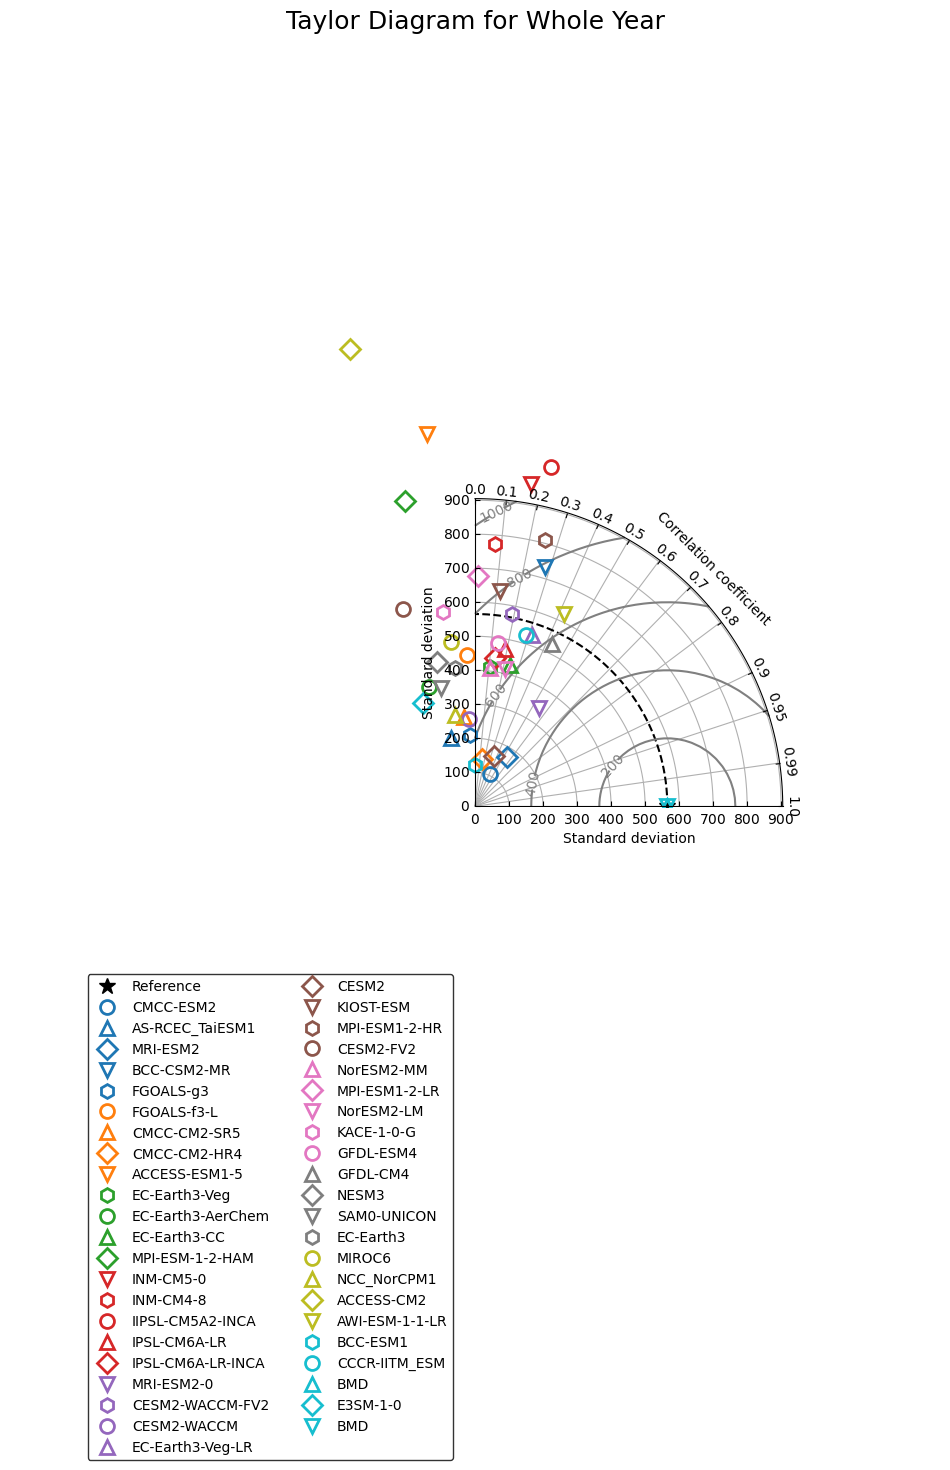

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()
        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
        # Standard deviation axis extent
        self.smin = 0
        self.smax = 1.6 * self.STD
        gh = fa.GridHelperCurveLinear(tr, extremes=(0, (np.pi / 2), self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)
        # Angle axis
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')
        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')
        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')
        # Useless
        ax.axis['bottom'].set_visible(False)
        # Contours along standard deviations
        ax.grid()
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates
        # Add reference point and STD contour
        l, = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_')
        # Collect sample points for later use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(12, 10))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    num_columns = 2
    num_per_col = (len(spl) + num_columns - 1) // num_columns
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper right', bbox_to_anchor=(0.5, -0.05), ncol=num_columns)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title("Taylor Diagram for Whole Year", fontsize=18)

    # Adjust scaling of the plot
    plt.xlim(-2 * obsSTD, 2 * obsSTD)
    plt.ylim(-2, 4 * obsSTD)

    plt.show()

# Extract data from model_stats
STD = model_stats_df['Std'].values
Correlation = model_stats_df['Corr'].values
Model_names = model_stats_df['Model'].values

# Reference standard deviation (BMD)
obsSTD = model_stats_df.loc[model_stats_df['Model'] == 'BMD', 'Std'].values[0]

# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')


# Final for taylor diagram

<ipython-input-50-4379cf018648>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


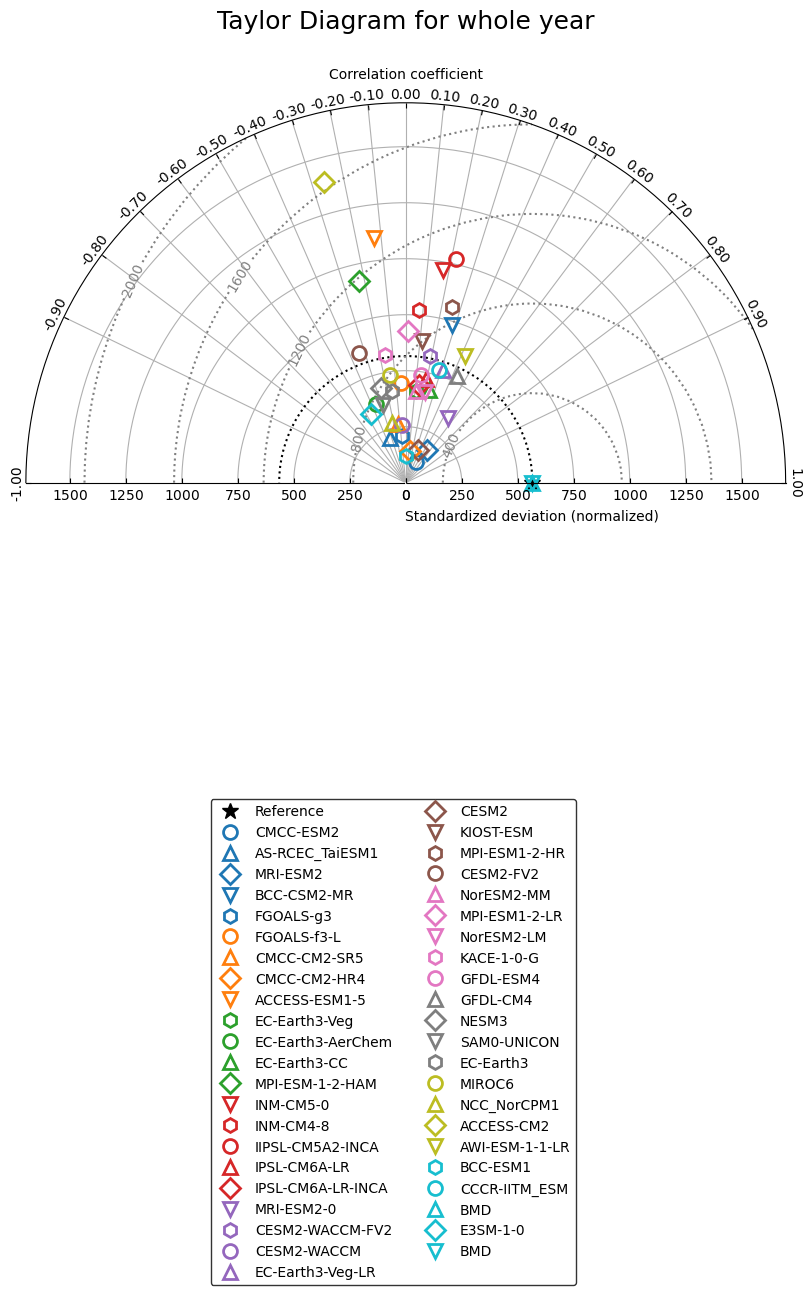

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 3* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for whole year", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()

# Extract data from model_stats
STD = model_stats_df['Std'].values
Correlation = model_stats_df['Corr'].values
Model_names = model_stats_df['Model'].values

# Reference standard deviation (BMD)
obsSTD = model_stats_df.loc[model_stats_df['Model'] == 'BMD', 'Std'].values[0]

# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')


In [ ]:
import pandas as pd
import os

# Define the directory paths for the datasets
bmd_filepath = "/content/drive/MyDrive/HS_Term_paper/Rain/BMD_monthly_sum.xlsx"
directory_path = "/content/drive/MyDrive/HS_Term_paper/Climate Models(1995-2014)"

# Step 1: Import BMD_monthly_sum and take sum for the months of the dry season
BMD_monthly_sum = pd.read_excel(bmd_filepath)
BMD_monthly_sum['Date'] = pd.to_datetime(BMD_monthly_sum['Date'])
BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()

BMD_mar_apr_sum = BMD_monthly_sum[(BMD_monthly_sum.index.month.isin([12, 1, 2])) &
                                  (BMD_monthly_sum.index.year >= 1995) &
                                  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
BMD_mar_apr_mean = BMD_mar_apr_sum.mean(axis=1)

# Columns to keep
columns_to_keep = BMD_monthly_sum.columns

# Step 2: Load the climate model datasets and process them similarly
files = os.listdir(directory_path)
model_datasets = {}

for file in files:
    if file.endswith(".xlsx"):
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)

        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

            # Keep only the columns that are in BMD_monthly_sum
            df = df[columns_to_keep.intersection(df.columns)]

            df = df.resample('M').sum()
            df_mar_apr_sum = df[(df.index.month.isin([10, 11])) &
                                (df.index.year >= 1995) &
                                (df.index.year <= 2014)].resample('Y').sum()
            df_mar_apr_mean = df_mar_apr_sum.mean(axis=1)

            model_datasets[file] = {
                'sum': df_mar_apr_sum,
                'mean': df_mar_apr_mean.mean(),
                'std': df_mar_apr_mean.std(),
                'corr': df_mar_apr_mean.corr(BMD_mar_apr_mean)
            }

# Combine all statistics into a DataFrame
model_stats = pd.DataFrame.from_dict(model_datasets, orient='index')
model_stats.reset_index(inplace=True)
model_stats.columns = ['Model', 'Combined Sum', 'Mean', 'Std', 'Corr']

# Add BMD statistics manually
bmd_stats = pd.DataFrame([{
    'Model': 'BMD',
    'Combined Sum': BMD_mar_apr_sum.sum().sum(),
    'Mean': BMD_mar_apr_mean.mean(),
    'Std': BMD_mar_apr_mean.std(),
    'Corr': 1.0
}])

model_stats_postmon = pd.concat([model_stats, bmd_stats], ignore_index=True)

# Print the final table
print("Model Statistics including Pearson Correlation with BMD Combined Sum (Dry):")
print(model_stats_postmon[['Model', 'Mean', 'Std', 'Corr']])


<ipython-input-56-def653f96098>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  BMD_monthly_sum = BMD_monthly_sum.set_index('Date').resample('M').sum()
<ipython-input-56-def653f96098>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (BMD_monthly_sum.index.year <= 2014)].resample('Y').sum()
<ipython-input-56-def653f96098>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-56-def653f96098>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()
<ipython-input-56-def653f96098>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-56-def653f96098>:40: FutureWarning: 'Y' is deprecated and will be rem

Model Statistics including Pearson Correlation with BMD Combined Sum (Dry):
                                Model        Mean         Std      Corr
0           CMCC-ESM2(1995-2014).xlsx  150.148157   61.599103 -0.352140
1     AS-RCEC_TaiESM1(1995-2014).xlsx  173.606253   94.015897 -0.048952
2            MRI-ESM2(1995-2014).xlsx  101.987525   73.959932 -0.122915
3         BCC-CSM2-MR(1995-2014).xlsx  259.158979  193.129269  0.329563
4           FGOALS-g3(1995-2014).xlsx   97.507398  110.823158  0.211428
5     FGOALS-f3-L(1995-2014) (1).xlsx  349.101867  260.500525  0.263472
6        CMCC-CM2-SR5(1995-2014).xlsx  378.685977  148.777977  0.107728
7        CMCC-CM2-HR4(1995-2014).xlsx  271.984781  149.126978  0.029667
8       ACCESS-ESM1-5(1995-2014).xlsx  242.282190  175.096352  0.144634
9       EC-Earth3-Veg(1995-2014).xlsx  253.379736  145.925862  0.022755
10  EC-Earth3-AerChem(1995-2014).xlsx  208.289101  140.043970  0.114585
11       EC-Earth3-CC(1995-2014).xlsx  241.210394   87.38367

<ipython-input-56-def653f96098>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
<ipython-input-56-def653f96098>:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  (df.index.year <= 2014)].resample('Y').sum()


In [ ]:
model_stats_postmon[['Model', 'Mean', 'Std', 'Corr']]

,Model,Mean,Std,Corr
0,CMCC-ESM2(1995-2014).xlsx,150.148157,61.599103,-0.352140
1,AS-RCEC_TaiESM1(1995-2014).xlsx,173.606253,94.015897,-0.048952
2,MRI-ESM2(1995-2014).xlsx,101.987525,73.959932,-0.122915
3,BCC-CSM2-MR(1995-2014).xlsx,259.158979,193.129269,0.329563
4,FGOALS-g3(1995-2014).xlsx,97.507398,110.823158,0.211428
5,FGOALS-f3-L(1995-2014) (1).xlsx,349.101867,260.500525,0.263472
6,CMCC-CM2-SR5(1995-2014).xlsx,378.685977,148.777977,0.107728
7,CMCC-CM2-HR4(1995-2014).xlsx,271.984781,149.126978,0.029667
8,ACCESS-ESM1-5(1995-2014).xlsx,242.282190,175.096352,0.144634
9,EC-Earth3-Veg(1995-2014).xlsx,253.379736,145.925862,0.022755


<ipython-input-65-81346d55ff95>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


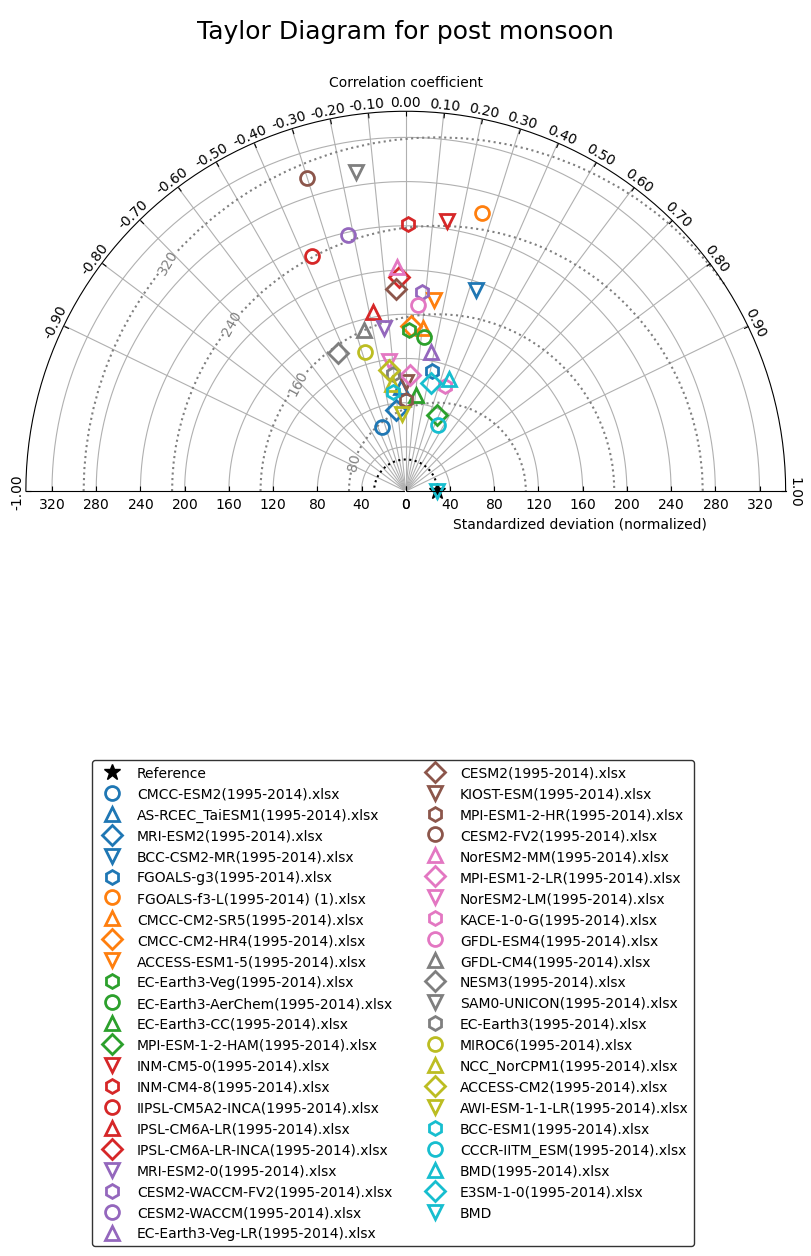

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 12* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for post monsoon", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()

# Extract data from model_stats
STD = model_stats_postmon['Std'].values
Correlation = model_stats_postmon['Corr'].values
Model_names = model_stats_postmon['Model'].values

# Reference standard deviation (BMD)
obsSTD = model_stats_postmon.loc[model_stats_postmon['Model'] == 'BMD', 'Std'].values[0]

# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')

<ipython-input-68-240360ff0e0e>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


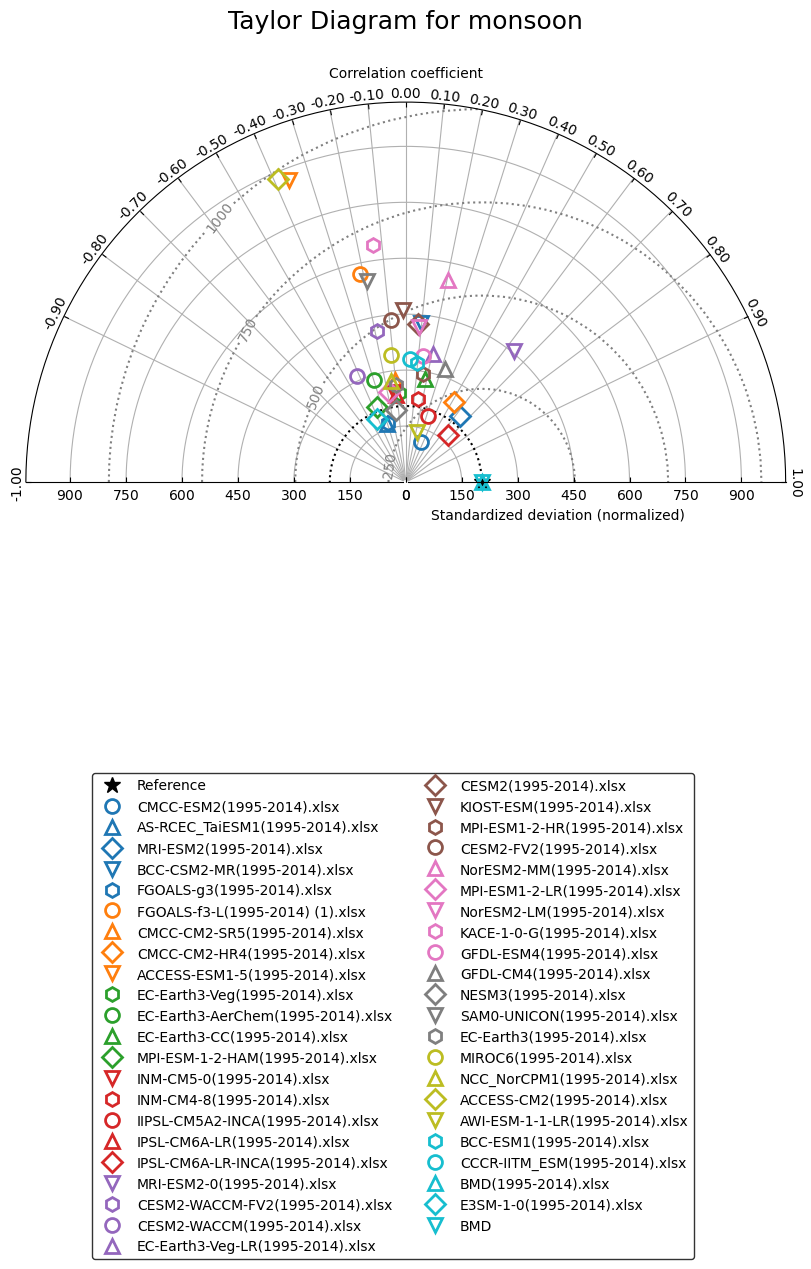

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 5* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for monsoon", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()

# Extract data from model_stats
STD = model_stats_mon['Std'].values
Correlation = model_stats_mon['Corr'].values
Model_names = model_stats_mon['Model'].values

# Reference standard deviation (BMD)
obsSTD = model_stats_mon.loc[model_stats_mon['Model'] == 'BMD', 'Std'].values[0]

# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')

<ipython-input-70-f0e14c02f802>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


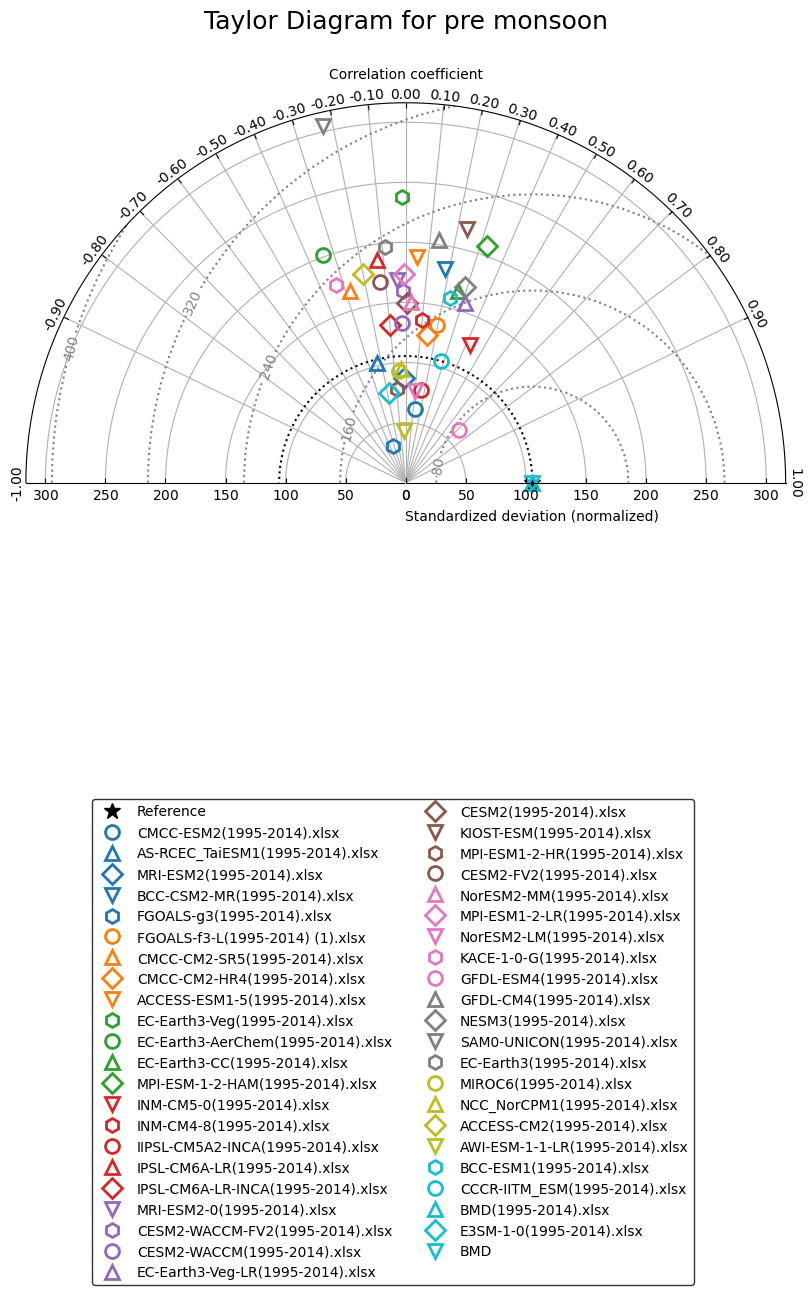

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 3* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for pre monsoon", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()

# Extract data from model_stats
STD = model_stats_premon['Std'].values
Correlation = model_stats_premon['Corr'].values
Model_names = model_stats_premon['Model'].values

# Reference standard deviation (BMD)
obsSTD = model_stats_premon.loc[model_stats_premon['Model'] == 'BMD', 'Std'].values[0]

# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')

<ipython-input-73-37d441f9664d>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


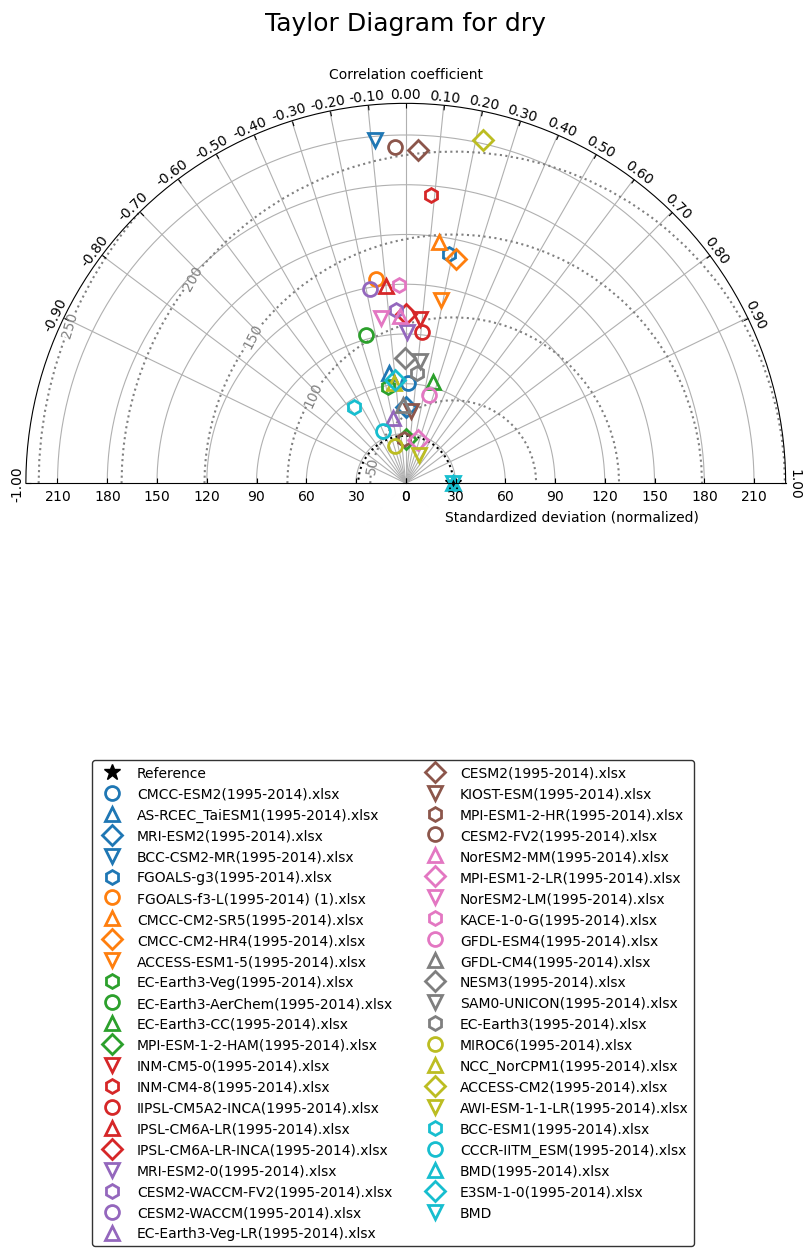

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 8* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for dry", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()


# Extract data from model_stats
STD = model_stats_dry['Std'].values
Correlation = model_stats_dry['Corr'].values
Model_names = model_stats_dry['Model'].values

# Reference standard deviation (BMD)
obsSTD = model_stats_dry.loc[model_stats_dry['Model'] == 'BMD', 'Std'].values[0]

# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')

In [ ]:
model_stats_dry
